In [21]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# loading data
data = pd.read_csv('heart_disease_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# checking the number of rows ans columns
data.shape

(303, 14)

In [24]:
# checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# checking dataset stats
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# checking the number of items for each value
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [27]:
# splitting the data in feature and target
X = data.drop(['target'], axis=1)
y = data['target']

In [28]:
# plitting the dataset in train and test samples
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2, stratify=y)

In [30]:
# importing model
from sklearn.linear_model import LogisticRegression

In [31]:
# fitting and predictin train sample
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [33]:
classification = classification_report(y_train, pred)
print(classification)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [34]:
roc = roc_auc_score(y_train, pred)
roc

np.float64(0.8484848484848484)

In [35]:
#  predictin test sample

pred_test = model.predict(X_test)
classification = classification_report(y_test, pred_test)
print(classification)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [36]:
roc = roc_auc_score(y_test, pred_test)
roc

np.float64(0.801948051948052)

In [41]:
# true positive rating, true negative rating an limit to generate a ROC Curve
tpr, tnr, limit = roc_curve(y_test, pred_test)



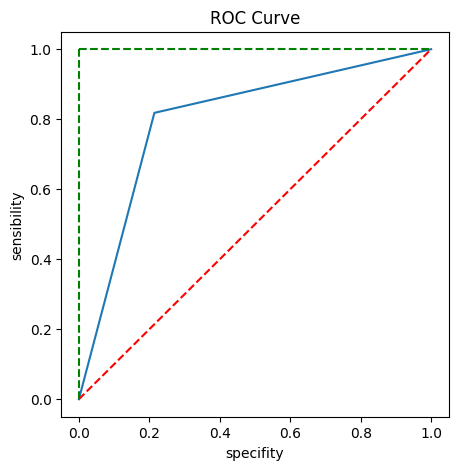

In [42]:
#plotting ROC Curve graph
plt.subplots(1, figsize = (5,5))
plt.title('ROC Curve')
plt.plot(tpr, tnr)
plt.xlabel('specifity')
plt.ylabel('sensibility')
plt.plot([0,1], ls = "--", c='red') #linha guia pontilhada vermelha
plt.plot([0,0], [1,0], ls= '--', c='green'), plt.plot([1,1], ls= '--', c='green') #linha guia pontilhada verde
plt.show()